# 加载库与训练、验证数据

In [1]:
import pandas as pd
import xgboost as xgb
from config import *
from sklearn.preprocessing import MinMaxScaler
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


# 调节参数

In [2]:
train=pd.read_csv('data/all_train.csv')

target = 'label'
predictors=[x for x in train.columns if x not in target]
# predictors

In [3]:
def modelfit(model, dtrain, predictors,useTrainCV=True, cv_folds=3, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = model.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=True)    

# 1、先用比较大的learning_rate，确定n_estimators

In [4]:
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=8000, max_depth=5, min_child_weight=1, 
                     gamma=0, subsample=0.7, colsample_bytree=0.7,colsample_bylevel=0.7,
                     objective= 'rank:pairwise',nthread=12, seed=0)

modelfit(xgb1, train, predictors)

[0]	train-auc:0.820173+0.00145423	test-auc:0.818148+0.00298234
[1]	train-auc:0.836738+0.000649656	test-auc:0.835256+0.00341393
[2]	train-auc:0.845546+0.00185456	test-auc:0.844316+0.00265305
[3]	train-auc:0.848916+0.00323697	test-auc:0.84782+0.00434575
[4]	train-auc:0.850914+0.00183403	test-auc:0.850052+0.00207024
[5]	train-auc:0.852672+0.00301336	test-auc:0.851447+0.00232721
[6]	train-auc:0.853817+0.0025186	test-auc:0.852597+0.00169907
[7]	train-auc:0.854001+0.00218558	test-auc:0.852656+0.00208521
[8]	train-auc:0.854748+0.00148161	test-auc:0.853565+0.00218902
[9]	train-auc:0.855091+0.00185201	test-auc:0.853834+0.0024408
[10]	train-auc:0.855672+0.00188845	test-auc:0.854376+0.00203905
[11]	train-auc:0.855843+0.00176334	test-auc:0.854618+0.0015959
[12]	train-auc:0.856558+0.00203328	test-auc:0.855395+0.00124063
[13]	train-auc:0.857246+0.00169473	test-auc:0.855998+0.00144275
[14]	train-auc:0.857785+0.00207145	test-auc:0.856511+0.00105622
[15]	train-auc:0.858226+0.00213959	test-auc:0.856866+

# 2、网格搜索 min_child_weight与max_depth

In [4]:
param_test1 = {'min_child_weight':[1,2,3,4],'max_depth':[4,5,6]}


gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=850,
                                                  gamma=0, subsample=0.7, colsample_bytree=0.7,colsample_bylevel=0.7,
                                                  objective= 'rank:pairwise', nthread=16, seed=0), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3,verbose=10)

gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=4, min_child_weight=1 .................................
[CV] max_depth=4, min_child_weight=1 .................................
[CV] max_depth=4, min_child_weight=1 .................................
[CV] max_depth=4, min_child_weight=2 .................................
[CV] ........ max_depth=4, min_child_weight=1, score=0.859340 - 8.5min
[CV] max_depth=4, min_child_weight=2 .................................
[CV] ........ max_depth=4, min_child_weight=1, score=0.886061 - 8.5min
[CV] max_depth=4, min_child_weight=2 .................................
[CV] ........ max_depth=4, min_child_weight=1, score=0.883097 - 8.5min
[CV] max_depth=4, min_child_weight=3 .................................
[CV] ........ max_depth=4, min_child_weight=2, score=0.858791 - 8.6min
[CV] max_depth=4, min_child_weight=3 .................................
[CV] ........ max_depth=4, min_child_weight=2, score=0.886193 - 8.9min


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 17.4min


[CV] max_depth=4, min_child_weight=3 .................................
[CV] ........ max_depth=4, min_child_weight=2, score=0.883861 - 8.9min
[CV] max_depth=4, min_child_weight=4 .................................
[CV] ........ max_depth=4, min_child_weight=3, score=0.859869 - 9.0min
[CV] max_depth=4, min_child_weight=4 .................................
[CV] ........ max_depth=4, min_child_weight=3, score=0.885618 - 8.9min
[CV] max_depth=4, min_child_weight=4 .................................
[CV] ........ max_depth=4, min_child_weight=4, score=0.860235 - 9.0min
[CV] max_depth=5, min_child_weight=1 .................................
[CV] ........ max_depth=4, min_child_weight=3, score=0.883508 - 9.1min
[CV] max_depth=5, min_child_weight=1 .................................


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 26.5min


[CV] ........ max_depth=4, min_child_weight=4, score=0.885929 - 9.0min
[CV] max_depth=5, min_child_weight=1 .................................
[CV] ........ max_depth=4, min_child_weight=4, score=0.882976 - 9.0min
[CV] max_depth=5, min_child_weight=2 .................................
[CV] ........ max_depth=5, min_child_weight=1, score=0.855706 -10.7min
[CV] max_depth=5, min_child_weight=2 .................................
[CV] ........ max_depth=5, min_child_weight=1, score=0.886291 -10.7min
[CV] max_depth=5, min_child_weight=2 .................................
[CV] ........ max_depth=5, min_child_weight=1, score=0.883501 -10.7min
[CV] max_depth=5, min_child_weight=3 .................................
[CV] ........ max_depth=5, min_child_weight=2, score=0.855087 -10.8min
[CV] max_depth=5, min_child_weight=3 .................................
[CV] ........ max_depth=5, min_child_weight=2, score=0.886525 -10.1min


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 47.3min


[CV] max_depth=5, min_child_weight=3 .................................
[CV] ........ max_depth=5, min_child_weight=2, score=0.883316 -10.1min
[CV] max_depth=5, min_child_weight=4 .................................
[CV] ........ max_depth=5, min_child_weight=3, score=0.856997 -10.1min
[CV] max_depth=5, min_child_weight=4 .................................
[CV] ........ max_depth=5, min_child_weight=3, score=0.886762 -10.1min
[CV] max_depth=5, min_child_weight=4 .................................
[CV] ........ max_depth=5, min_child_weight=4, score=0.856159 - 9.7min
[CV] max_depth=6, min_child_weight=1 .................................
[CV] ........ max_depth=5, min_child_weight=4, score=0.883560 - 9.7min
[CV] max_depth=6, min_child_weight=1 .................................
[CV] ........ max_depth=5, min_child_weight=3, score=0.882994 - 9.7min
[CV] max_depth=6, min_child_weight=1 .................................
[CV] ........ max_depth=5, min_child_weight=4, score=0.886316 - 9.7min
[CV] m

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 57.1min


[CV] ........ max_depth=6, min_child_weight=1, score=0.884472 -11.6min
[CV] max_depth=6, min_child_weight=2 .................................
[CV] ........ max_depth=6, min_child_weight=1, score=0.881550 -11.6min
[CV] max_depth=6, min_child_weight=2 .................................
[CV] ........ max_depth=6, min_child_weight=2, score=0.850589 -11.6min
[CV] ........ max_depth=6, min_child_weight=1, score=0.849461 -11.7min
[CV] max_depth=6, min_child_weight=3 .................................
[CV] max_depth=6, min_child_weight=3 .................................
[CV] ........ max_depth=6, min_child_weight=2, score=0.881825 -11.5min
[CV] max_depth=6, min_child_weight=3 .................................
[CV] ........ max_depth=6, min_child_weight=2, score=0.884029 -11.5min
[CV] ........ max_depth=6, min_child_weight=3, score=0.884335 -11.5min
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .

[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed: 91.7min finished


([mean: 0.87617, std: 0.01196, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: 0.87628, std: 0.01240, params: {'max_depth': 4, 'min_child_weight': 2},
  mean: 0.87633, std: 0.01167, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: 0.87638, std: 0.01148, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.87517, std: 0.01381, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.87498, std: 0.01412, params: {'max_depth': 5, 'min_child_weight': 2},
  mean: 0.87558, std: 0.01323, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.87534, std: 0.01361, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.87183, std: 0.01586, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: 0.87215, std: 0.01527, params: {'max_depth': 6, 'min_child_weight': 2},
  mean: 0.87292, std: 0.01418, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: 0.87288, std: 0.01410, params: {'max_depth': 6, 'min_child_weight': 4}],
 {'max_depth': 4, 'min_child_weight': 4

# 3、网格搜索 gamma

In [4]:
param_test3 = {'gamma':[0,0.1,0.2]}

gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=850, max_depth=4, 
                                                  min_child_weight=4, subsample=0.7, colsample_bytree=0.7,
                                                  colsample_bylevel=0.7,objective= 'rank:pairwise', 
                                                  nthread=16,seed=0),
                        param_grid = param_test3, scoring='roc_auc',n_jobs=3,iid=False, cv=3,verbose=20)

gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] gamma=0 .........................................................
[CV] gamma=0 .........................................................
[CV] gamma=0 .........................................................
[CV] ................................ gamma=0, score=0.885929 - 6.3min
[CV] gamma=0.1 .......................................................


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  6.3min


[CV] ................................ gamma=0, score=0.860235 - 6.3min


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  6.3min


[CV] gamma=0.1 .......................................................
[CV] ................................ gamma=0, score=0.882976 - 6.3min
[CV] gamma=0.1 .......................................................


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  6.4min


[CV] .............................. gamma=0.1, score=0.858791 - 6.4min


[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed: 12.7min


[CV] gamma=0.2 .......................................................
[CV] .............................. gamma=0.1, score=0.886050 - 6.4min


[Parallel(n_jobs=3)]: Done  10 out of   9 | elapsed: 12.7min remaining:  -76.5s


[CV] gamma=0.2 .......................................................
[CV] .............................. gamma=0.1, score=0.883787 - 6.4min
[CV] gamma=0.2 .......................................................


[Parallel(n_jobs=3)]: Done  10 out of   9 | elapsed: 12.8min remaining:  -76.6s


[CV] .............................. gamma=0.2, score=0.859186 - 7.2min


[Parallel(n_jobs=3)]: Done  10 out of   9 | elapsed: 19.9min remaining:  -119.4s


[CV] .............................. gamma=0.2, score=0.885855 - 7.2min
[CV] .............................. gamma=0.2, score=0.883514 - 7.2min


[Parallel(n_jobs=3)]: Done  10 out of   9 | elapsed: 19.9min remaining:  -119.5s
[Parallel(n_jobs=3)]: Done  10 out of   9 | elapsed: 19.9min remaining:  -119.6s
[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed: 19.9min finished


([mean: 0.87638, std: 0.01148, params: {'gamma': 0},
  mean: 0.87621, std: 0.01235, params: {'gamma': 0.1},
  mean: 0.87619, std: 0.01206, params: {'gamma': 0.2}],
 {'gamma': 0},
 0.87637995658139933)

# 4、网格搜索 subsample、colsample_bytree

In [4]:
param_test4 = {'subsample':[0.7, 0.8],'colsample_bytree':[0.7,0.8]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=850, max_depth=4,
                                                  colsample_bylevel=0.7,min_child_weight=4, gamma=0, 
                                                  objective= 'rank:pairwise', nthread=16,seed=0),
                        param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=3,verbose=10)

gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] subsample=0.7, colsample_bytree=0.7 .............................
[CV] subsample=0.7, colsample_bytree=0.7 .............................
[CV] subsample=0.7, colsample_bytree=0.7 .............................
[CV] subsample=0.8, colsample_bytree=0.7 .............................
[CV] .... subsample=0.7, colsample_bytree=0.7, score=0.860006 - 7.3min
[CV] subsample=0.8, colsample_bytree=0.7 .............................
[CV] .... subsample=0.8, colsample_bytree=0.7, score=0.857750 - 7.3min
[CV] subsample=0.8, colsample_bytree=0.7 .............................
[CV] .... subsample=0.7, colsample_bytree=0.7, score=0.883937 - 7.3min
[CV] .... subsample=0.7, colsample_bytree=0.7, score=0.886902 - 7.4min
[CV] subsample=0.7, colsample_bytree=0.8 .............................
[CV] subsample=0.7, colsample_bytree=0.8 .............................
[CV] .... subsample=0.8, colsample_bytree=0.7, score=0.886700 - 7.1min


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 14.5min


[CV] subsample=0.7, colsample_bytree=0.8 .............................
[CV] .... subsample=0.8, colsample_bytree=0.7, score=0.883909 - 7.2min
[CV] subsample=0.8, colsample_bytree=0.8 .............................
[CV] .... subsample=0.7, colsample_bytree=0.8, score=0.886263 - 7.6min
[CV] subsample=0.8, colsample_bytree=0.8 .............................
[CV] .... subsample=0.7, colsample_bytree=0.8, score=0.859648 - 7.6min
[CV] subsample=0.8, colsample_bytree=0.8 .............................
[CV] .... subsample=0.8, colsample_bytree=0.8, score=0.859929 - 7.2min
[CV] .... subsample=0.7, colsample_bytree=0.8, score=0.883175 - 7.2min
[CV] .... subsample=0.8, colsample_bytree=0.8, score=0.883936 - 7.0min
[CV] .... subsample=0.8, colsample_bytree=0.8, score=0.886090 - 7.0min


[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 22.0min finished


([mean: 0.87695, std: 0.01204, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.87612, std: 0.01304, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.87636, std: 0.01189, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.87665, std: 0.01186, params: {'subsample': 0.8, 'colsample_bytree': 0.8}],
 {'colsample_bytree': 0.7, 'subsample': 0.7},
 0.87694803358885887)

# 5、网格搜索 reg_lambda

In [5]:
param_test5 = {'reg_lambda':[0.1, 1, 10]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=850, max_depth=4, 
                                                  min_child_weight=4, gamma=0, subsample=0.7, colsample_bytree=0.7, 
                                                  colsample_bylevel=0.7,objective= 'rank:pairwise', nthread=16,seed=0),
                        param_grid = param_test5, scoring='roc_auc',n_jobs=3,iid=False, cv=3,verbose=10)

gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch6.best_score_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] reg_lambda=0.1 ..................................................
[CV] reg_lambda=0.1 ..................................................
[CV] reg_lambda=0.1 ..................................................
[CV] reg_lambda=1 ....................................................
[CV] ......................... reg_lambda=0.1, score=0.884920 - 7.6min
[CV] reg_lambda=1 ....................................................
[CV] ......................... reg_lambda=0.1, score=0.856006 - 7.6min
[CV] ......................... reg_lambda=0.1, score=0.883534 - 7.6min
[CV] reg_lambda=1 ....................................................
[CV] reg_lambda=10 ...................................................


[Parallel(n_jobs=4)]: Done  10 out of   9 | elapsed:  7.6min remaining:  -45.8s


[CV] ........................... reg_lambda=1, score=0.859929 - 7.7min
[CV] reg_lambda=10 ...................................................


[Parallel(n_jobs=4)]: Done  10 out of   9 | elapsed:  7.7min remaining:  -46.1s


[CV] ........................... reg_lambda=1, score=0.886090 - 7.5min


[Parallel(n_jobs=4)]: Done  10 out of   9 | elapsed: 15.1min remaining:  -90.9s


[CV] reg_lambda=10 ...................................................
[CV] ........................... reg_lambda=1, score=0.883936 - 7.5min


[Parallel(n_jobs=4)]: Done  10 out of   9 | elapsed: 15.2min remaining:  -90.9s


[CV] .......................... reg_lambda=10, score=0.862677 - 7.6min


[Parallel(n_jobs=4)]: Done  10 out of   9 | elapsed: 15.2min remaining:  -91.1s


[CV] .......................... reg_lambda=10, score=0.887006 - 7.5min


[Parallel(n_jobs=4)]: Done  10 out of   9 | elapsed: 15.2min remaining:  -91.3s


[CV] .......................... reg_lambda=10, score=0.884880 - 2.1min


[Parallel(n_jobs=4)]: Done  10 out of   9 | elapsed: 17.3min remaining:  -103.7s
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed: 17.3min finished


([mean: 0.87482, std: 0.01332, params: {'reg_lambda': 0.1},
  mean: 0.87665, std: 0.01186, params: {'reg_lambda': 1},
  mean: 0.87819, std: 0.01100, params: {'reg_lambda': 10}],
 {'reg_lambda': 10},
 0.87818788088204158)

# 6、使用较小的learning_rate确定n_estimators

In [6]:
xgb2 = XGBClassifier(learning_rate =0.01,n_estimators=6000,max_depth=4,min_child_weight=4,
                     gamma=0,subsample=0.7,colsample_bytree=0.7,colsample_bylevel=0.7,reg_lambda=10, 
                     objective= 'rank:pairwise',nthread=12,seed=0)

modelfit(xgb2, train, predictors)

[0]	train-auc:0.8069+0.00236451	test-auc:0.8058+0.00212298
[1]	train-auc:0.826057+0.000737477	test-auc:0.824577+0.0009972
[2]	train-auc:0.832459+0.00388171	test-auc:0.831069+0.00462703
[3]	train-auc:0.837271+0.00254117	test-auc:0.836154+0.00124522
[4]	train-auc:0.83811+0.00161146	test-auc:0.83689+0.00134869
[5]	train-auc:0.83847+0.0024815	test-auc:0.836961+0.00172943
[6]	train-auc:0.840505+0.00176656	test-auc:0.839438+0.0020859
[7]	train-auc:0.840791+0.00171359	test-auc:0.839901+0.00168108
[8]	train-auc:0.840947+0.00138599	test-auc:0.840229+0.00203974
[9]	train-auc:0.840979+0.00115454	test-auc:0.840358+0.00243048
[10]	train-auc:0.842071+0.000495238	test-auc:0.841351+0.00265175
[11]	train-auc:0.842178+0.000236255	test-auc:0.841427+0.00271801
[12]	train-auc:0.841748+0.000333644	test-auc:0.84099+0.00248851
[13]	train-auc:0.841682+0.00036116	test-auc:0.840924+0.00253985
[14]	train-auc:0.842169+0.000179052	test-auc:0.841447+0.00297543
[15]	train-auc:0.84217+0.000162412	test-auc:0.841545+0.0

# 在所有数据上训练模型

In [8]:
all_train=pd.read_csv('data/all_train.csv')
all_train_x = all_train.drop(['label'],axis=1)
all_train_y = all_train.label

print all_train.shape

all_train = xgb.DMatrix(all_train_x,all_train_y)

(393427, 56)


In [9]:
params={'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'eval_metric':'auc',
	    'gamma':0,
	    'min_child_weight':4,
	    'max_depth':4,
	    'lambda':10,
	    'subsample':0.7,
	    'colsample_bytree':0.7,
	    'colsample_bylevel':0.7,
	    'eta': 0.01,
	    'tree_method':'exact',
	    'nthread':12
	    }

In [ ]:
watchlist = [(all_train,'train')]

model = xgb.train(params,all_train,num_boost_round=7000,evals=watchlist)#,xgb_model=model)


[0]	train-auc:0.818903
[1]	train-auc:0.82251
[2]	train-auc:0.831078
[3]	train-auc:0.835949
[4]	train-auc:0.837577
[5]	train-auc:0.838939
[6]	train-auc:0.839108
[7]	train-auc:0.839955
[8]	train-auc:0.839935
[9]	train-auc:0.839568
[10]	train-auc:0.839586
[11]	train-auc:0.839637
[12]	train-auc:0.839444
[13]	train-auc:0.839922
[14]	train-auc:0.839569
[15]	train-auc:0.839674
[16]	train-auc:0.839461
[17]	train-auc:0.839366
[18]	train-auc:0.841388
[19]	train-auc:0.841606
[20]	train-auc:0.841718
[21]	train-auc:0.841523
[22]	train-auc:0.841734
[23]	train-auc:0.841565
[24]	train-auc:0.841741
[25]	train-auc:0.841971
[26]	train-auc:0.842008
[27]	train-auc:0.842118
[28]	train-auc:0.843065
[29]	train-auc:0.843393
[30]	train-auc:0.843455
[31]	train-auc:0.843344
[32]	train-auc:0.843363
[33]	train-auc:0.84324
[34]	train-auc:0.843107
[35]	train-auc:0.843071
[36]	train-auc:0.842999
[37]	train-auc:0.843377
[38]	train-auc:0.843316
[39]	train-auc:0.84333
[40]	train-auc:0.843527
[41]	train-auc:0.843388
[42]	

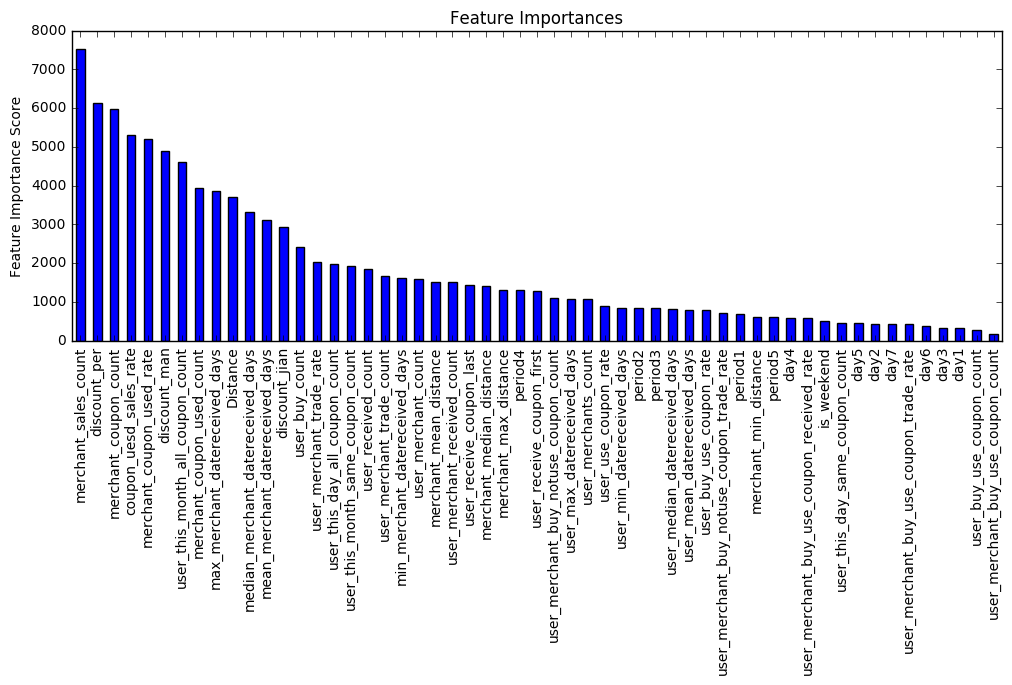

In [14]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

feat_imp = pd.Series(model.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [11]:
test=pd.read_csv('data/all_test.csv')
test_x = test.drop(['User_id','Coupon_id','Merchant_id','Date_received','Discount_rate'],axis=1)
test_preds = test[['User_id','Coupon_id','Date_received']]

print test_x.shape
test = xgb.DMatrix(test_x)

(112803, 55)


In [12]:
model.save_model('xgb7000.model')
# model = xgb.Booster()
# model.load_model("0002.model")

In [13]:
#predict test set
test_preds.loc[:,'Probability'] = model.predict(test)
test_preds.Probability = MinMaxScaler().fit_transform(test_preds.Probability)
test_preds.sort_values(by=['Coupon_id','Probability'],inplace=True)
test_preds.to_csv("xgb_preds.csv",index=None)


/usr/local/Cellar/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/Cellar/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [ ]:
# 